## Cassagrain telescope
The system consists of a source, parabolic primary mirror with central hole, hyperbolic secondary mirror and a detector at Cassagrain  focus. As the mirror parameters are not optimized, spot diagram shows not-to-a-point convergence. The Mueller matrix for the on-axis field is identity as the system is axially symmetric.  

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
S = pap.Source(10000, Clear=180)                                    # Source for ray analysis
Sd = pap.Source(20, Clear=180)                                      # Source for ray display
#
M1 = pap.Surface(200, R=-2000, K=-1.0, 
             Mirror=True, n2=1.1+6.8j, iDia=40)                     # Primary mirror with hole
M1.translateOrigin(z=1000)
#
M2 = pap.Surface(100, R=-500, K=-1.01,
             Mirror=True, n2=1.1+6.8j)                              # Secondary mirror with hole
M2.translateOrigin(z=200)
#
D = pap.Detector(10)                                                # Detector
D.translateOrigin(z=1200)                                           # Adjust the position

In [3]:
Sys = pap.System(S, [M1, M2], D, dRays=Sd)                          # Complete optical system
Sys.propagateRays()

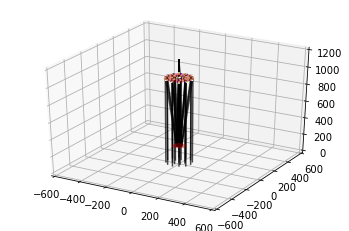

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                        # Draw optical system
Sys.Components[0].drawPolarizationDirection(Ax, 10)
pap.adjustAspect(Ax, 1200, z=600)                                   # Adjust 3D space
plt.show()

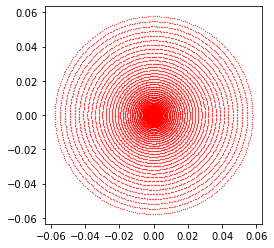

In [5]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                           # Draw spot diagram
plt.show()

In [6]:
MM, Tra = Sys.getSystemMuellerMatrix()                              # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000  0.00000  0.00000  0.00000]
 [ 0.00000  1.00000  0.00000  0.00000]
 [ 0.00000  0.00000  1.00000 -0.00000]
 [ 0.00000 -0.00000 -0.00000  1.00000]]
Throughput is:  0.7545698896027908
